FileNotFoundError: [Errno 2] No such file or directory: '/mnt/dcf_sensitivity_analysis_transparent.png'

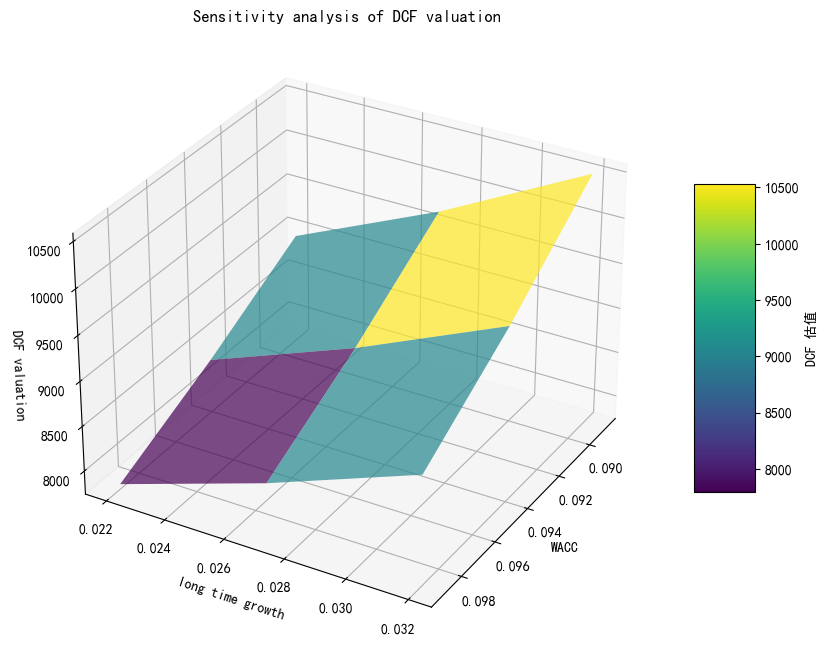

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 重新定义数据
wacc_values = np.array([0.089, 0.094, 0.099])
g_values = np.array([0.022, 0.027, 0.032])
dcf_values = np.array([
    [8957.668179954011, 9680.060775111593, 10529.18891327928],
    [8335.607889679426, 8957.668179954007, 9680.06077511159],
    [7794.334650089853, 8335.607889679426, 8957.668179954011]
])

# 创建三维图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 生成网格
WACC, G = np.meshgrid(wacc_values, g_values)

# 定义颜色映射
colors = plt.cm.get_cmap('viridis')

# 绘制半透明的三维曲面图
surf = ax.plot_surface(WACC, G, dcf_values.T, cmap=colors, alpha=0.7)

plt.rcParams['font.sans-serif'] = ['SimHei'] #设置能显示中文

# 调整颜色条范围和刻度
norm = plt.Normalize(vmin=dcf_values.min(), vmax=dcf_values.max())
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, shrink=0.5, aspect=5)
cbar.set_label('DCF 估值')

# 设置坐标轴标签
ax.set_xlabel('WACC')
ax.set_ylabel('long time growth')
ax.set_zlabel('DCF valuation')
ax.set_title('Sensitivity analysis of DCF valuation')

# 调整视角
ax.view_init(elev=30, azim=30)

# 保存图片
plt.savefig('/mnt/dcf_sensitivity_analysis_transparent.png')
from IPython.display import Image
Image('/mnt/dcf_sensitivity_analysis_transparent.png')